<a href="https://colab.research.google.com/github/jwyzfe/lstm_project/blob/main/codes/lstm%EC%B6%95%EC%97%B4%EC%A1%B0%20%EC%8B%9C%EA%B3%84%EC%97%B4%20%EC%98%88%EC%B8%A1final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
#colab과 googledrive 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [105]:
import pandas as pd

# CSV 파일 불러오기 (드라이브 경로 지정)
file_path = '/content/drive/My Drive/lstm/test_data.csv'
df = pd.read_csv(file_path)

In [106]:
import keras
import pandas as pd

file_path = '/content/drive/My Drive/lstm/test_data.csv'
df = pd.read_csv(file_path)

f = open(file_path)  # 'fname' 대신 'file_path'를 사용
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print("데이터의 수", len(lines))


['데이터_수집일', '축열조공급온도', '축열조환수온도', '주축부하공급온도', '주축부하환수온도', '주축온도1', '주축온도2', '주축온도3', '주축온도4', '보축부하공급온도', '보축부하환수온도', '보축온도1', '보축온도2', '보축온도3', '보축온도4', '주축수위', '보축수위']
데이터의 수 18518


In [107]:
#데이터 형식 확
import pandas as pd

# 데이터 불러오기
file_path = '/content/drive/My Drive/lstm/test_data.csv'
df = pd.read_csv(file_path)

# 데이터프레임의 처음 몇 행 출력
print("데이터프레임의 처음 몇 행:")
print(df.head())

# 데이터프레임의 기초 통계 정보 출력
print("데이터프레임의 기초 통계 정보:")
print(df.describe())

# 각 열의 데이터 형식 출력
print("각 열의 데이터 형식:")
print(df.dtypes)

데이터프레임의 처음 몇 행:
               데이터_수집일    축열조공급온도    축열조환수온도   주축부하공급온도   주축부하환수온도      주축온도1  \
0  2021-06-28 14:00:00  16.381250  18.243750   7.100000  20.606250  17.775000   
1  2021-06-28 15:00:00  16.663333  18.443333   7.225000  20.270000  18.423333   
2  2021-06-28 16:00:00  17.058333  18.700000  10.306667  21.551667  18.431667   
3  2021-06-28 17:00:00  17.463333  18.921667  15.803333  21.085000  18.416667   
4  2021-06-28 18:00:00  17.828333  19.155000  16.315000  21.065000  18.420000   

      주축온도2     주축온도3     주축온도4   보축부하공급온도   보축부하환수온도      보축온도1      보축온도2  \
0  7.806250  6.937500  6.606250  13.768750  21.275000  20.843750  19.050000   
1  8.176667  7.028333  6.635000  14.176667  22.076667  20.848333  19.068333   
2  8.310000  7.078333  6.693333  14.810000  22.680000  20.856667  19.063333   
3  8.341667  7.103333  6.700000  15.718333  22.065000  20.851667  19.073333   
4  8.366667  7.103333  6.761667  16.511667  21.743333  20.848333  19.090000   

       보축온도3      보축온도

<Figure size 1000x800 with 0 Axes>

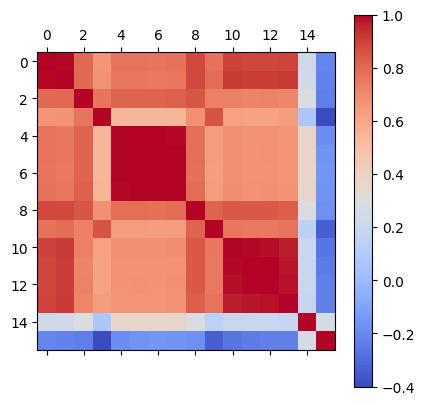

In [108]:
# 날짜 열을 datetime 형식으로 변환
df['데이터_수집일'] = pd.to_datetime(df['데이터_수집일'], errors='coerce')

# 숫자형 데이터만 선택 (datetime 형식 제외)
df_numeric = df.select_dtypes(include=['number'])

# 상관 관계 계산
correlation_matrix = df_numeric.corr()

# 상관 관계 시각화
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.show()

In [109]:
# 필요한 열만 선택 (주축수위 포함)
numeric_features = ['축열조공급온도', '축열조환수온도', '주축부하공급온도', '주축부하환수온도', '주축온도1', '주축온도2', '주축온도3', '주축온도4', '주축수위']
df = df[numeric_features]

In [110]:
# 결측치 처리 (평균값으로 대체)
df.fillna(df.mean(), inplace=True)

<ipython-input-110-86746326593b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)


In [111]:
# 결측치 확인
missing_values = df.isnull().sum()

# 결측치가 있는 열 출력
print("각 열에 대한 결측치 수:")
print(missing_values)

# 결측치가 있는지 확인
if missing_values.any():
    print("\n결측치가 존재합니다.")
else:
    print("\n결측치가 없습니다.")


각 열에 대한 결측치 수:
축열조공급온도     0
축열조환수온도     0
주축부하공급온도    0
주축부하환수온도    0
주축온도1       0
주축온도2       0
주축온도3       0
주축온도4       0
주축수위        0
dtype: int64

결측치가 없습니다.


In [112]:
# 스케일링 (MinMaxScaler 사용)
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [113]:
# 시퀀스 데이터 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length, :-1]  # X: 마지막 열 제외
        label = data[i+seq_length, -1]  # y: 마지막 열 (주축수위)
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)


In [114]:
# 시퀀스 길이 설정
seq_length = 10

In [115]:
# 데이터를 시퀀스로 변환
X, y = create_sequences(df_scaled.values, seq_length)


In [116]:
# 데이터를 훈련, 검증, 테스트 세트로 분리
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [117]:
# LSTM 모델 구축
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# 모델 학습
#history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping 설정 (validation loss가 개선되지 않으면 훈련을 중단)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stopping])


🔹 1. 배치 크기와 일반화 성능의 관계
배치 크기는 모델이 가중치를 업데이트하는 빈도와 안정성에 영향을 줍니다.

배치 크기가 클수록 (예: 64) 업데이트 횟수가 줄어들어 학습이 더 안정적으로 진행되지만, 지역 최적점(local minimum)에 빠질 위험이 높음
배치 크기가 작을수록 (예: 16) 업데이트가 더 자주 이루어지지만, 너무 작으면 노이즈의 영향을 많이 받아 손실 값이 불안정해질 가능성이 높음
즉, 배치 크기를 64 → 32로 줄일 때는 노이즈가 적절히 반영되어 더 일반화 성능이 좋아졌지만, 32 → 16으로 줄이니 노이즈가 너무 커져 학습이 불안정해지고 성능이 악화되었을 가능성이 큼

🔹 2. 배치 크기와 옵티마이저의 상호작용
Adam과 같은 옵티마이저는 배치 크기에 따라 학습률이 다르게 영향을 받을 수 있음.

큰 배치 크기 (64 이상): 모델이 비교적 부드러운 방향으로 최적점을 찾아가지만, 지역 최적점에 갇힐 가능성이 있음
중간 배치 크기 (32 정도): 충분한 데이터가 포함되면서도 학습이 적절히 일반화됨
작은 배치 크기 (16 이하): 업데이트가 너무 자주 발생하여 최적화가 불안정해지고 손실 값이 크게 변동할 수 있음
즉, 배치 크기를 16으로 줄이면 옵티마이저가 너무 자주 업데이트되어 훈련이 불안정해지고 성능이 더 나빠질 가능성이 높음.



In [ ]:
# 학습 과정 시각화
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [126]:
# 모델 예측
y_pred = model.predict(X_test)


116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [127]:
# 예측값을 원래 스케일로 복원
y_test_rescaled = scaler.inverse_transform(np.hstack([np.zeros((y_test.shape[0], X_test.shape[2])), y_test.reshape(-1, 1)]))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.hstack([np.zeros((y_pred.shape[0], X_test.shape[2])), y_pred.reshape(-1, 1)]))[:, -1]


In [ ]:
# 실제값과 예측값 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual 주축수위', color='blue', alpha=0.6)
plt.plot(y_pred_rescaled, label='Predicted 주축수위', color='red', alpha=0.6)
plt.title('Actual vs Predicted 주축수위')
plt.xlabel('Time')
plt.ylabel('주축수위')
plt.legend()
plt.show()

In [ ]:
# 평가 메트릭 계산
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
print(f"평균 제곱 오차 (MSE): {mse}")
print(f"평균 제곱근 오차 (RMSE): {rmse}")